In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15123, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 15123 (delta 42), reused 33 (delta 12), pack-reused 15045
Receiving objects: 100% (15123/15123), 14.19 MiB | 5.19 MiB/s, done.
Resolving deltas: 100% (10359/10359), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.2.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49

In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:


from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("major-jgafo").project("major_prototype")
dataset = project.version(3).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/major_prototype-3 in yolov5pytorch:: 100%|██████████| 366/366 [00:00<00:00, 1898.61it/s]


In [ ]:
!python train.py --img 416 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/major_prototype-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hs

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

In [ ]:
from utils.plots import plot_results
plot_results('/content/yolov5/runs/train/exp/results.csv')  # plot 'results.csv' as 'results.png'


#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
%pip install clearml>=1.2.0


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.3 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/major_prototype-3/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/18 /content/datasets/major_prototype-3/test/images/26_jpg.rf.7caaa3d867fe10a84faf75d8aa5cf064.jpg: 416x416 1 car, 8.8ms
image 2/18 /content/datasets/major_prototype-3/test/images/27_jpg.rf.4a92611e9b783060602d01fc883908dd.jpg: 416x416 1 car, 8.6ms
image 3/18 /content/datasets/major_prototype-3/test/images/2_jpg

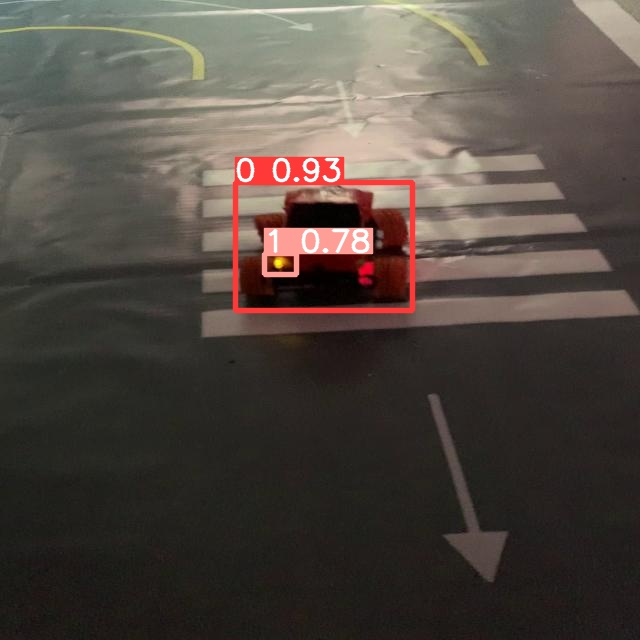

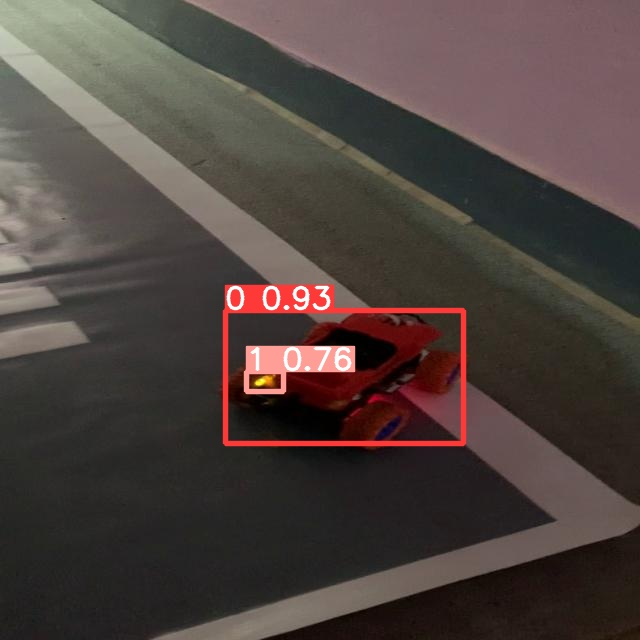

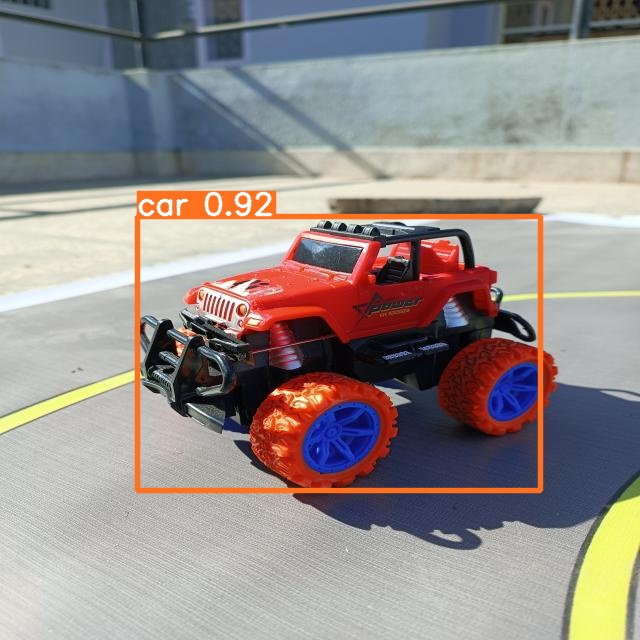

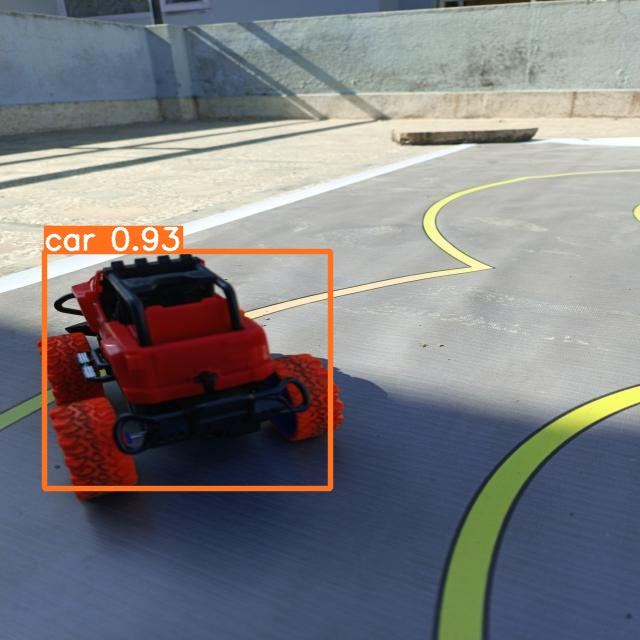

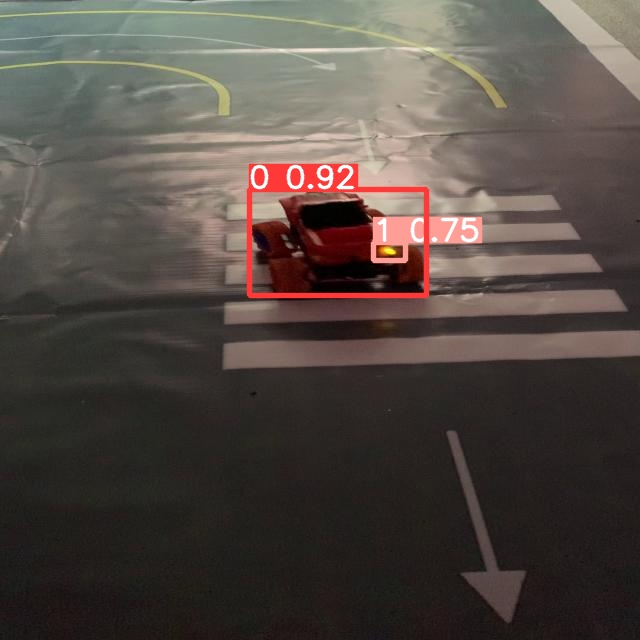

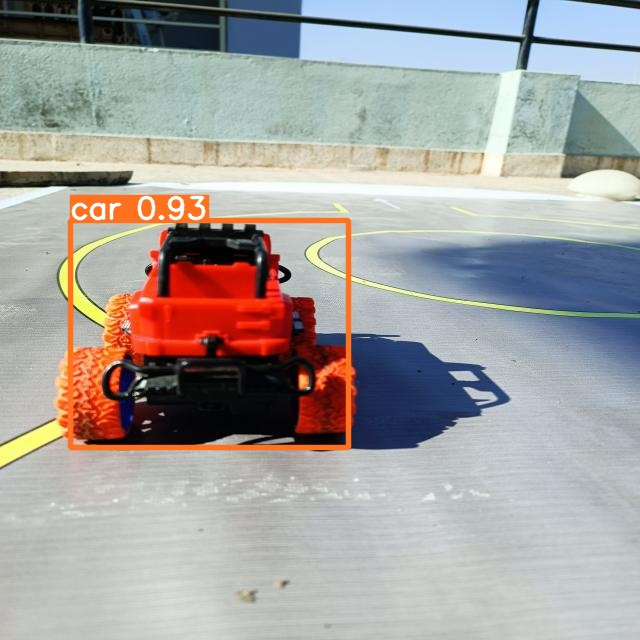

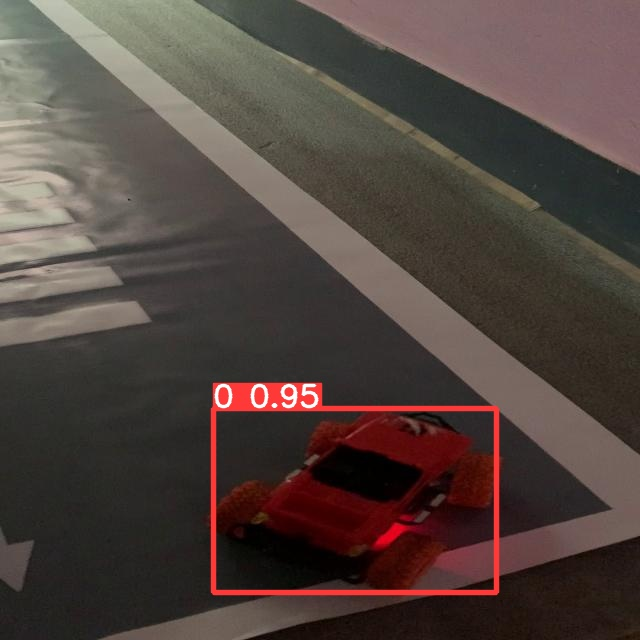

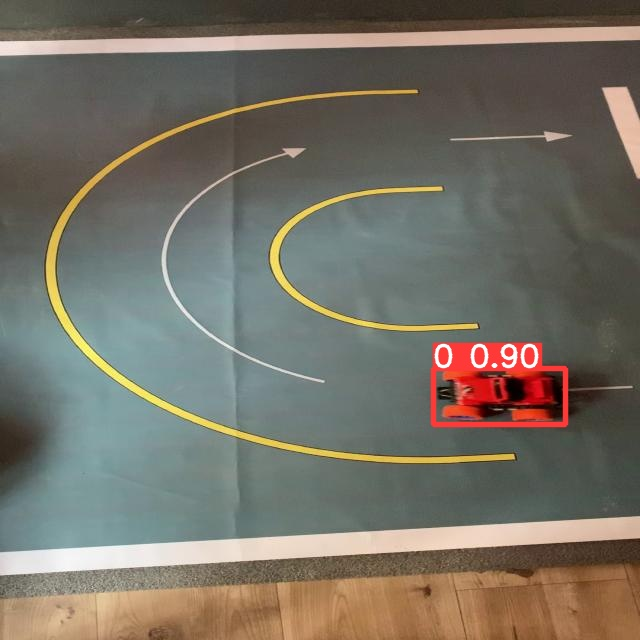

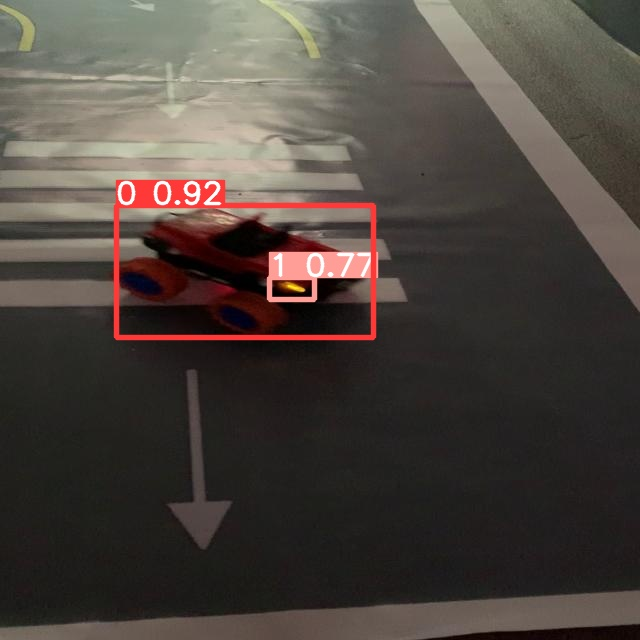

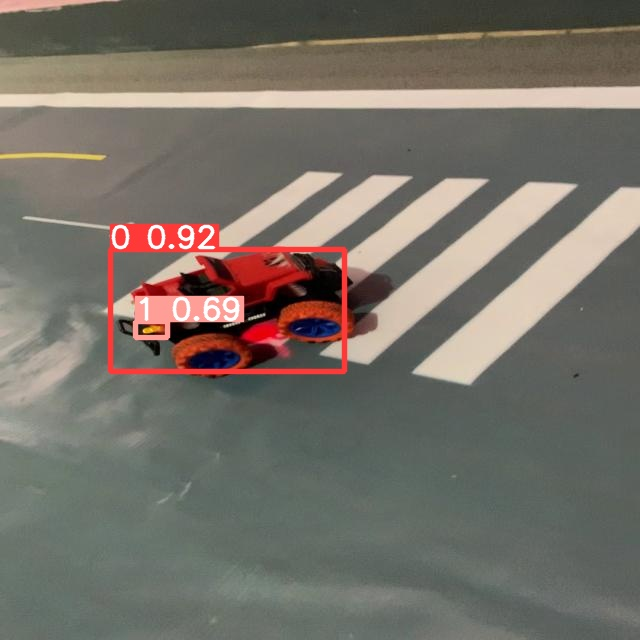

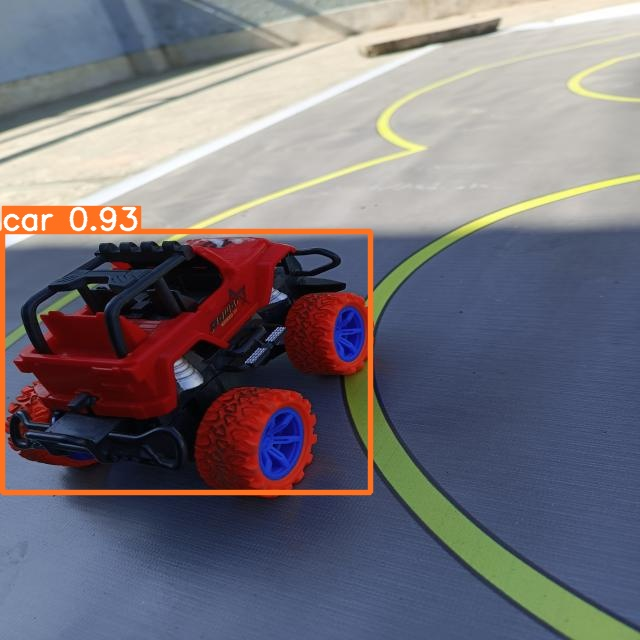

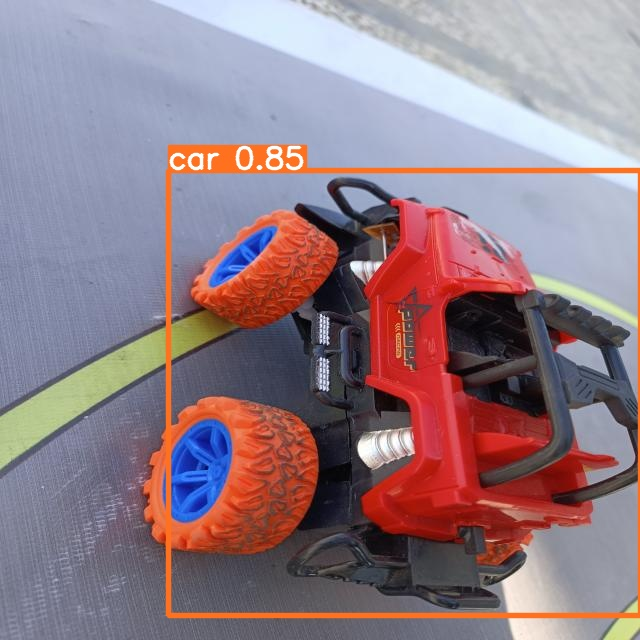

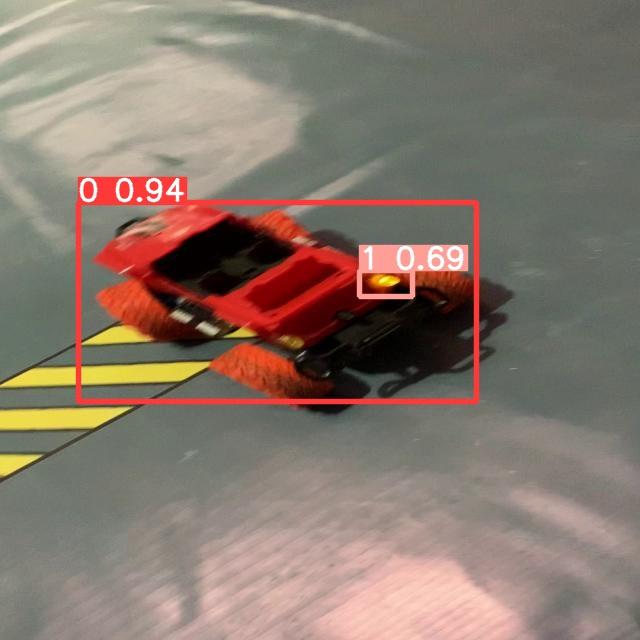

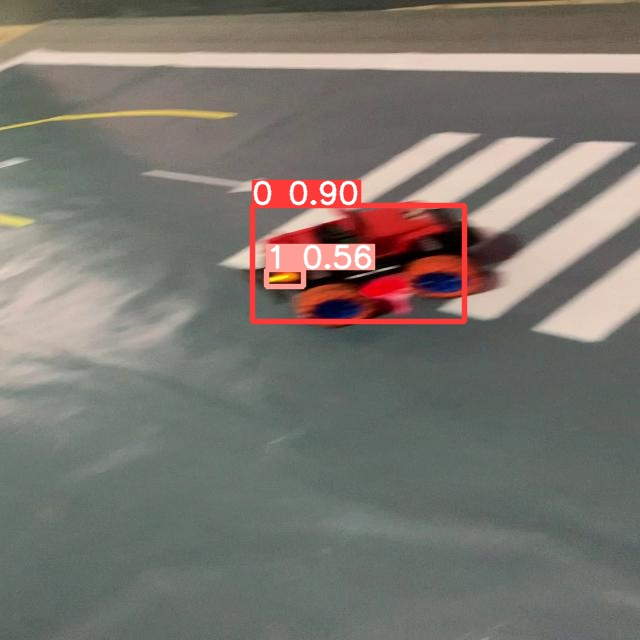

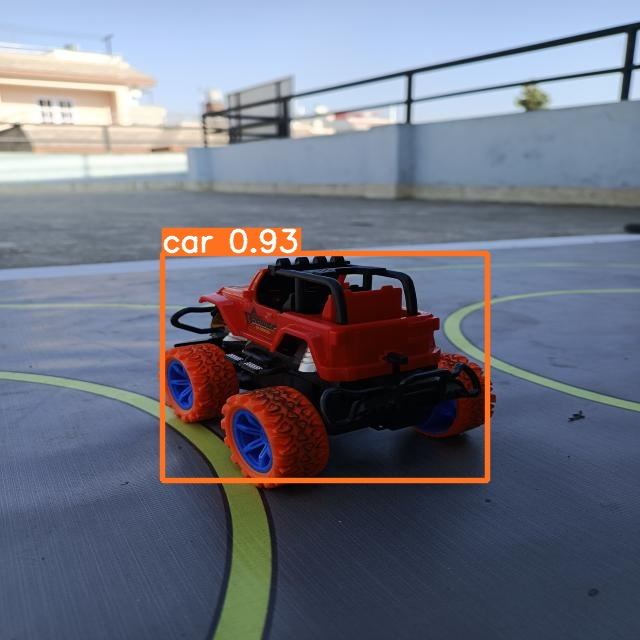

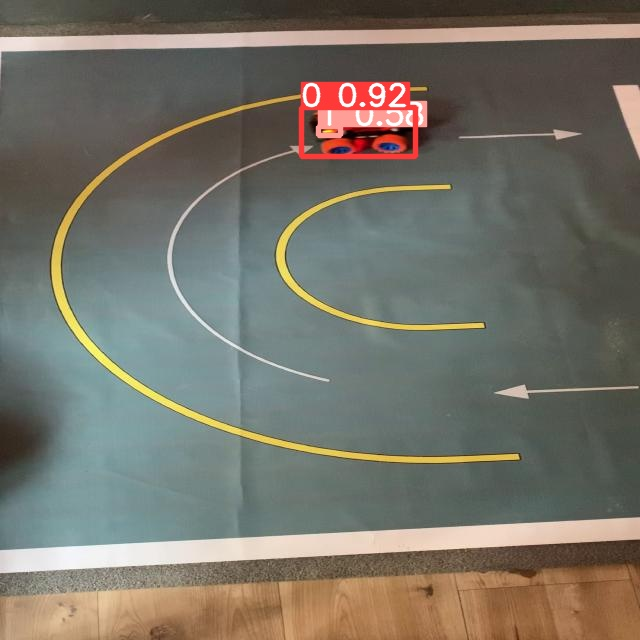

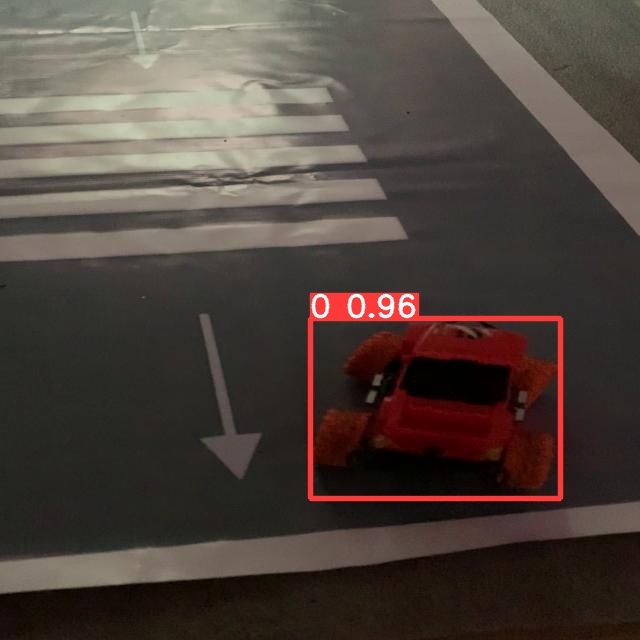

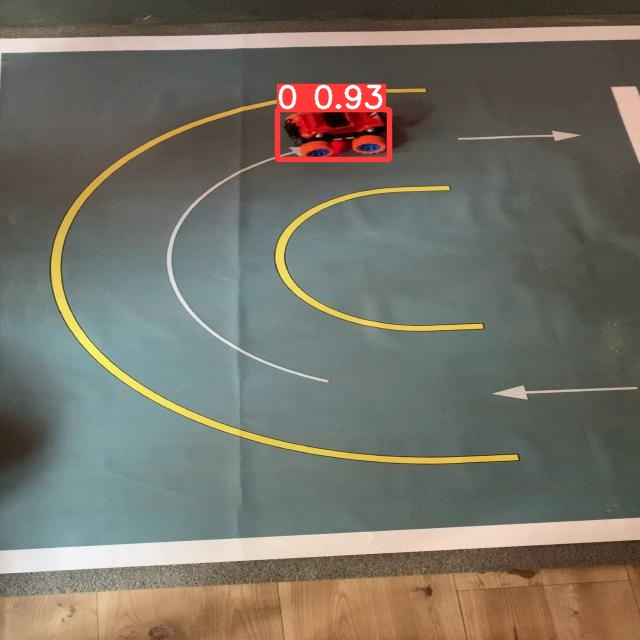

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Conclusion and Next Steps

Congratulations! You've trained a custom YOLOv5 model to recognize your custom objects.

To improve you model's performance, we recommend first interating on your datasets coverage and quality. See this guide for [model performance improvement](https://github.com/ultralytics/yolov5/wiki/Tips-for-Best-Training-Results).

To deploy your model to an application, see this guide on [exporting your model to deployment destinations](https://github.com/ultralytics/yolov5/issues/251).

Once your model is in production, you will want to continually iterate and improve on your dataset and model via [active learning](https://blog.roboflow.com/what-is-active-learning/).

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np


In [ ]:
net = cv2.dnn.readNetFromDarknet("/content/yolov5s.cfg", "/content/best.pt")

error: ignored

In [ ]:
import cv2
import torch
import numpy as np

# Load the pre-trained YOLOv5 model
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True).eval().to('cuda')

model = torch.load('/content/best.pt')
model.eval()

# Read input frames from a camera
cap = cv2.VideoCapture("/content/test_video2.mp4")

# Loop over each frame
while True:
    # Read a frame
    ret, frame = cap.read()

    # Preprocess the frame
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = torch.from_numpy(frame).to('cuda').float() / 255.0
    frame = frame.permute(2, 0, 1).unsqueeze(0)

    # Run the model on the frame
    outputs = model(frame)

    # Extract the predictions
    boxes = outputs[0]['boxes'].cpu().detach().numpy()
    scores = outputs[0]['scores'].cpu().detach().numpy()
    classes = outputs[0]['classes'].cpu().detach().numpy().astype(np.int32)

    # Perform non-maximum suppression
    keep = cv2.dnn.NMSBoxes(boxes, scores, conf_threshold=0.5, nms_threshold=0.5)

    # Visualize the results
    for i in keep:
        box = boxes[i]
        x, y, w, h = box
        x1, y1, x2, y2 = x - w / 2, y - h / 2, x + w / 2, y + h / 2
        c = classes[i]
       


